An example of generating neutrino flux from secluded DM

#Author: Q.R Liu

#Make sure you can run nuSQUIDs

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from charon import propa
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()

Same as in exmple_propagate, first we construct the object.

In [3]:
#info of DM
mass = 1e3

ch = 'bb' #channel

#info of neutrino spectrum binning. 
Emin         = 1.
nodes        = 100
Emax         = mass
bins         = 250

#info of oscillation parameters
theta_12=33.58
theta_13=9.12
theta_23=40.4
delta_m_12=7.58e-5
delta_m_13=2.35e-3
delta = 0.

theta_12=33.58
theta_13=9.12
theta_23=40.4
delta_m_12=7.58e-5
delta_m_13=2.35e-3
delta = 0.

path = '../production/secluded/' 
#make sure you have generated fluxes at production first. 
#If you direct to the folder of the *dat files generated by charon production, 
#charon would pack them to a npy file in shape (len(energies),len(densities)) 
#or path can be directed to a npy file in the same format directly

Flux = propa.NuFlux(ch,mass,nodes,Emin=Emin,Emax=Emax,bins=bins,
                    theta_12=theta_12,theta_13=theta_13,theta_23=theta_23,
                     delta_m_12=delta_m_12,delta_m_13=delta_m_13,delta=delta,pathFlux=path)


Information needed for the secluded scenario.

In [4]:
#mediator mass
mass_v = 100.0

#decay length for Sun case
lambda_v_sun   = pc.SUNRADIUS*1.

#decay length for Sun case
lambda_v_earth = pc.EARTHRADIUS*0.1

segment = 30   #number of points picked along the mediator moving direction
p       = 0.99 #fraction of decay 
ncpu    = 30   #number of cpus for multiprocessing computation.

Plot the initial flux of different locations in/outside the Sun. Initial fluxes need to be generated first, which can be referred in $../production$. 

Initial Flux Loading: ../production/secluded//bb_1000.0_100.0.npy


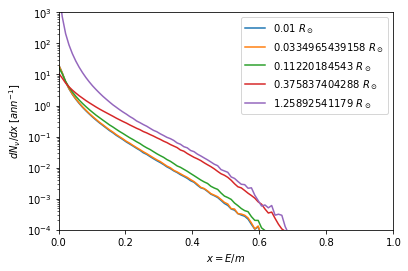

In [5]:
r = np.logspace(-2,0.1,5)*pc.SUNRADIUS #in km
Sun_ini_flux = Flux.iniFlux_secluded('Sun',mass_v,r)

x = Flux.iniE()/mass
for i in range(len(r)):
    plt.plot(x,Sun_ini_flux['nu_mu'][i],label=r'{} $R_\odot$'.format(r[i]/pc.SUNRADIUS))


plt.ylim(1e-4,1e3)
plt.xlim(0.0,1.0)
plt.yscale('log')
plt.xlabel(r"$x = E/m$")
plt.ylabel(r"$dN_\nu/dx\;[ann^{-1}]$")
plt.legend()
plt.show()

In [6]:
Sunflux      = Flux.SunSecluded(segment,lambda_v_sun,mass_v,
                        '1AU',p=p,ncpu=ncpu,avg=True)

Earthflux    = Flux.EarthSecluded(segment,lambda_v_earth,mass_v,
                        'detector',p=p,ncpu=ncpu,avg=True)                        

Initial Flux Loading: ../production/secluded//bb_1000.0_100.0.npy
Initial Flux Loading: ../production/secluded//bb_1000.0_100.0.npy


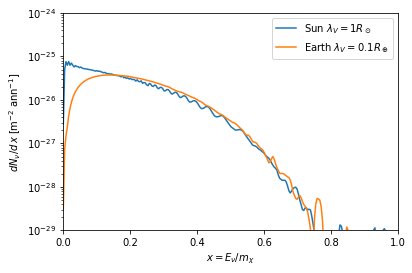

In [7]:
x = Sunflux['Energy']/mass
plt.plot(x,x**2*Sunflux['nu_mu']/p/(4*np.pi*(pc.AU/pc.meter)**2),
        linewidth=1.5,label='Sun $\lambda_V=1R_\odot$')
plt.plot(x,x**2*Earthflux['nu_mu']/p/(4*np.pi*(pc.AU/pc.meter)**2),
         linewidth=1.5,label='Earth $\lambda_V=0.1R_\oplus$')

plt.ylim(1e-29,1e-24)
plt.yscale('log')
plt.xlim(0.,1.)
plt.xlabel(r'$x=E_\nu/m_\chi$')
plt.ylabel(r'$dN_\nu/d\,x\;\left[\rm{m^{-2}\;ann^{-1}}\right]$')
plt.legend()
plt.show()

================

End. ヾ(๑╹ꇴ◠๑)ﾉ"